In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [57]:
df=pd.read_csv('economic_index.csv')

In [58]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [59]:
#drop uncessary columns
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.drop(columns=['year'], axis=1, inplace=True)
df.drop(columns=['month'], axis=1, inplace=True)

In [60]:
#drop null columns
df.isnull().sum() #no null columns


interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

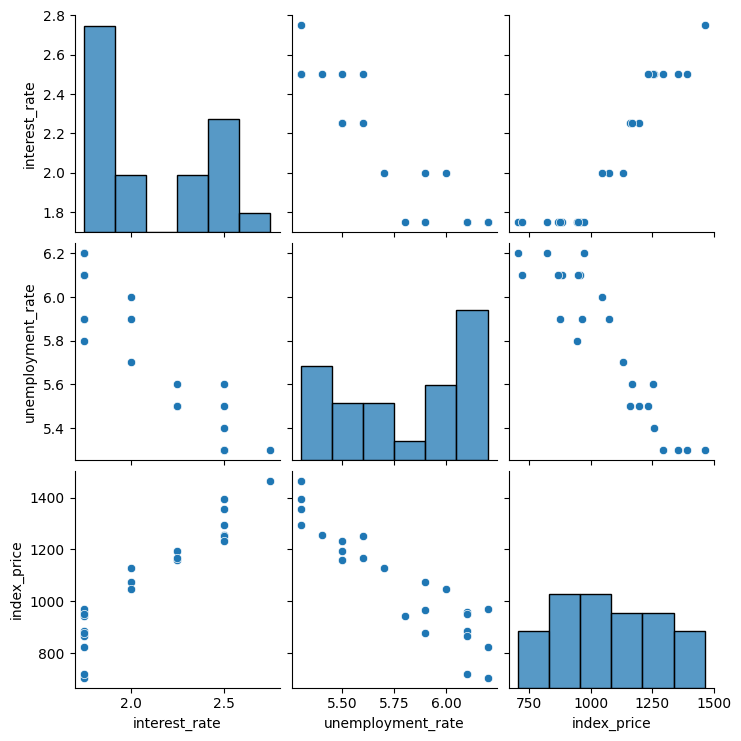

In [61]:
#letsss doooo some visualization
sns.pairplot(df)

In [62]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0.5, 0, 'unemployment_rate')

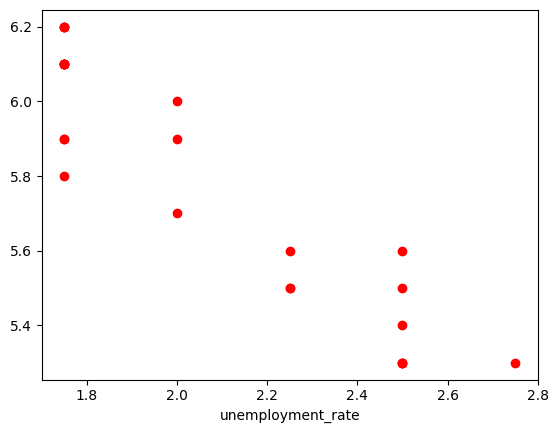

In [63]:
#lets visualize more clearly
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.xlabel('interest_rate')
plt.xlabel('unemployment_rate')

In [64]:
#independent and dependent features
# X=df[['intereset_rate','unemployment_rate']] instead we can alos do
X=df.iloc[:,:-1] #take everything except the last one
y=df.iloc[:,-1] #take only the last one

In [65]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

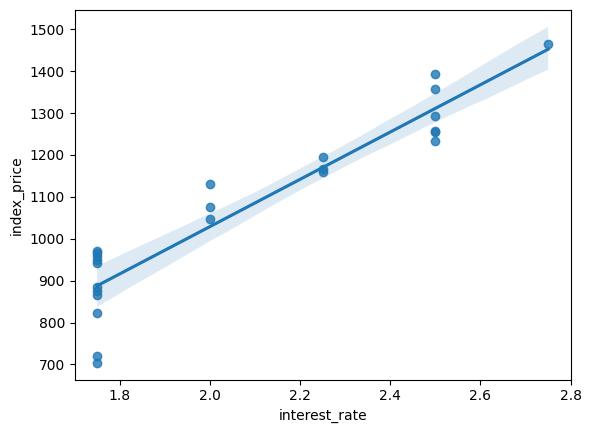

In [66]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

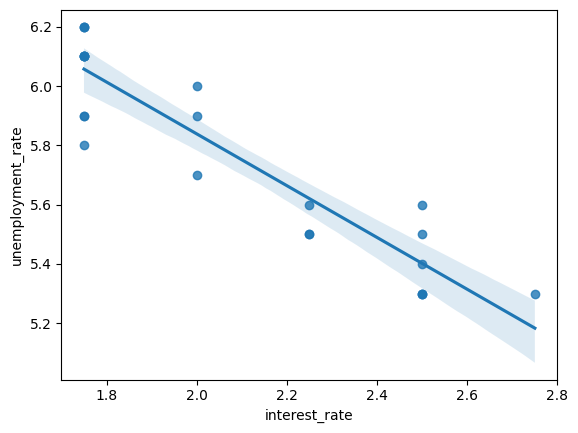

In [67]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [68]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [70]:
#cross_val_score way to get mse into folds
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(validation_score)

-5914.828180162386

In [71]:
#prediction
y_pred=regression.predict(X_test)

In [72]:
#PERFORMANCE METRIC
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2__score=r2_score(y_test,y_pred)
adj_r2 = 1 - (1 - r2__score) * ((len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
print(mse)
print(mae)
print(rmse)
print(r2__score)
print(adj_r2)

5793.762887712569
59.935781523235484
76.11677139574805
0.8278978091457145
0.7131630152428575


8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


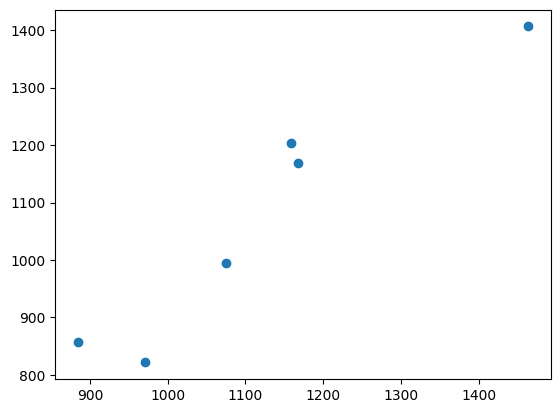

In [73]:
#assumption
plt.scatter(y_test,y_pred)
residuals=y_test-y_pred
print(residuals)

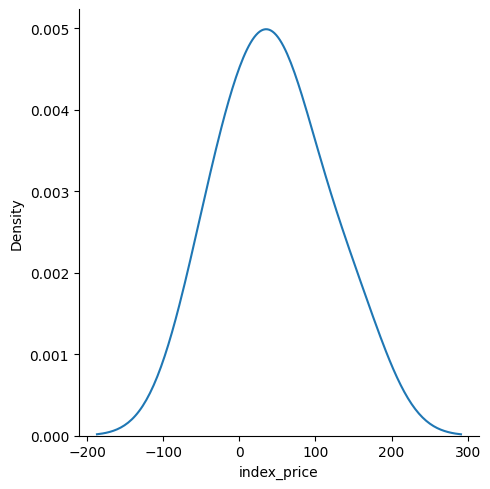

In [ ]:
#plot the residuals
sns.displot(residuals,kind='kde') #good uniform distribution

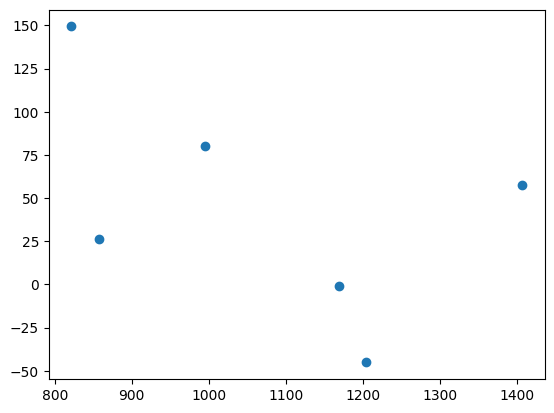

In [77]:
#scatter plot with respect to residuals and prediction
plt.scatter(y_pred,residuals)